##1.数据预处理
加载和查看数据

In [150]:
# 导入需要的库
import pandas as pd

In [151]:
# 加载数据（假设文件名为 diabetes.csv，你可以根据路径修改）
data_path = 'E:/数据分析项目/Diabetes Dataset/diabetes_dataset.csv'
df = pd.read_csv(data_path)

In [152]:
# 查看数据的前几行
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [153]:
# 查看数据的基本信息，包括数据类型和缺失值
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [154]:
# 计算每个特征中的缺失值数量
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # 只保留有缺失值的特征

# 创建一个包含缺失值信息的 DataFrame
missing_df = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing Values': missing_values.values
}).reset_index(drop=True)
missing_df.index.name = 'Sr_no'

# 显示缺失值表格
print("Missing Values:")
print(missing_df.to_string(index=True))

Missing Values:
Empty DataFrame
Columns: [Feature, Missing Values]
Index: []


In [155]:
#查看基本统计信息：通过数据的描述性统计信息（如均值、标准差、最大值、最小值等）来初步检查各列数据的合理性，尤其是Glucose、BloodPressure、SkinThickness、Insulin和BMI等数值型特征。异常值往往会与其他值的差异较大，比如血压为0的记录可能就是异常的。
# 统计数据的基本描述信息
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

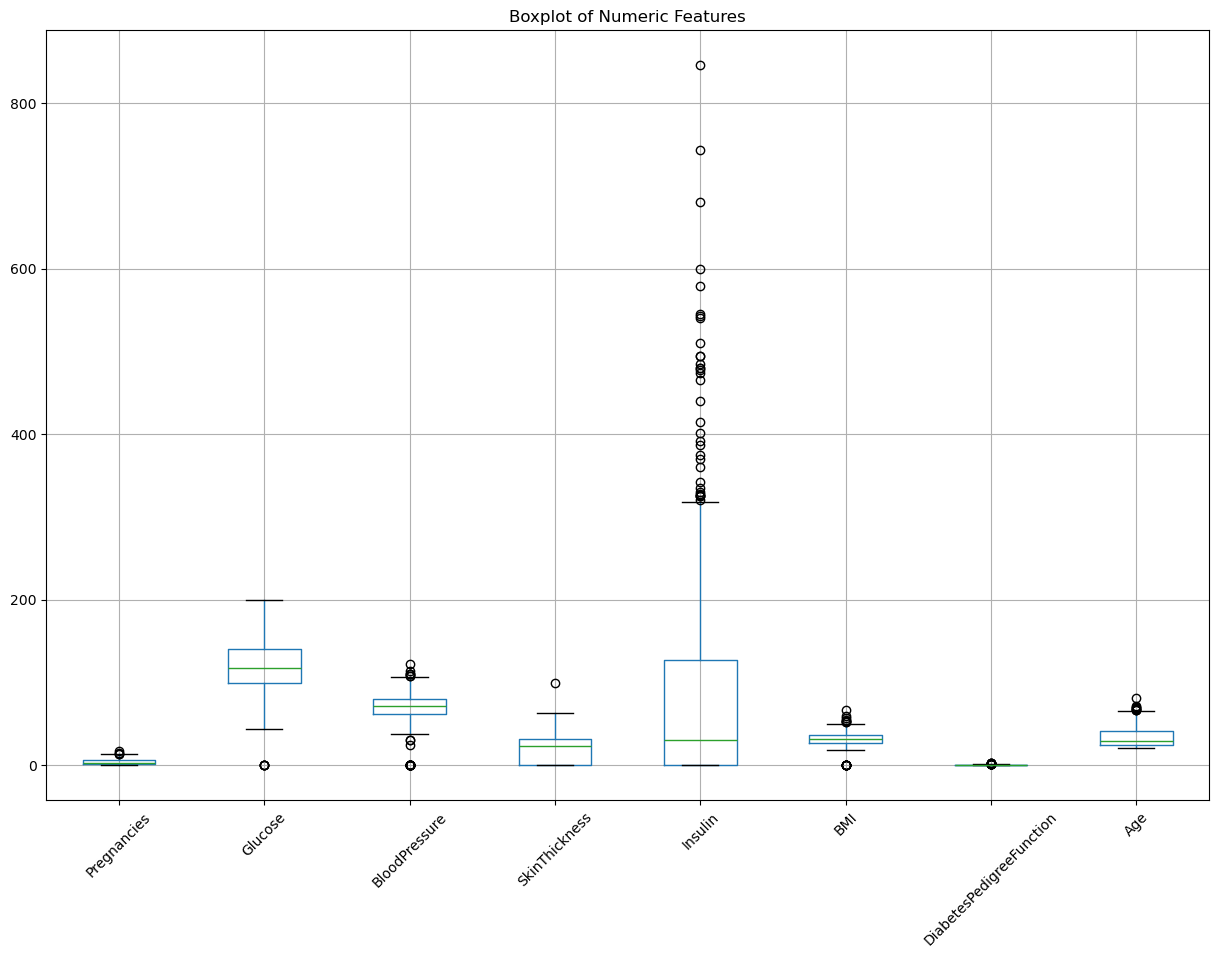

In [156]:
##异常值检测 - 使用箱线图：箱线图可以帮助我们快速识别出潜在的异常值（即“胡须”之外的点）。你可以为每个数值型特征绘制一个箱线图来直观地查看异常值。
import matplotlib.pyplot as plt
# 绘制箱线图，查看异常值情况
plt.figure(figsize=(15, 10))
df.boxplot(column=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Features')
plt.show()

在这张箱线图中，我们可以看到每个数值型特征的分布情况，特别是异常值的位置和范围。具体分析如下：

Pregnancies（怀孕次数）：
大多数数据集中在0到10次之间，少数异常值超过10次。
怀孕次数的高值可能是真实数据，但依然值得检查是否与特定人群特征相关。

Glucose（血糖浓度）：
分布较为集中，范围在50到200之间。
存在少数较低的异常值，尤其是为0的情况。血糖值为0在生理上不可能，这类异常值可能需要处理。

BloodPressure（血压）：
大部分数据集中在50到100 mm Hg之间，有一些低值（接近0），这可能是不合理的测量值。
血压为0通常是异常的，需要进一步处理这些不合理值。

SkinThickness（皮肤厚度）：
分布主要集中在10到50 mm之间。
存在一些接近0的异常值，皮肤厚度为0不太可能，因此这些值可能也是缺失数据，需要进一步处理。

Insulin（胰岛素水平）：
该特征存在大量异常值，且分布范围较广（接近800）。
胰岛素的极端高值和为0的低值都需要特别关注。0值通常代表缺失数据或记录错误，可能需要补充或处理。

BMI（体重指数）：
分布集中在20到50之间，符合一般人的体重指数范围。
少量异常值接近0的情况可能是测量误差或缺失。

DiabetesPedigreeFunction（糖尿病家族史系数）：
分布较集中在0到1之间，少量高值可能是一些极端病例，但无明显异常。

Age（年龄）：
年龄分布主要在20到50岁之间，符合一般的糖尿病患病群体。
有少数接近80的高值，但这些应该是合理的生理数据。

基于以上分析，我们需要针对这些异常值进行处理，尤其是那些生理上不合理的0值。将零值替换为中位数（或平均值）：针对Glucose、BloodPressure、SkinThickness、Insulin和BMI这几个特征，我们可以将不合理的0值替换为该特征的中位数。

In [157]:
# 检查指定列中的零值数量
cols_with_zero_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 确认这些列的值是否可以正确转换为数值类型
df[cols_with_zero_values] = df[cols_with_zero_values].apply(pd.to_numeric, errors='coerce')

# 统计每个列中值为0的数量
zero_counts = (df[cols_with_zero_values] == 0).sum()

# 显示统计结果
print("Zero values count before replacement:")
print(zero_counts)



Zero values count before replacement:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [158]:
# 选择需要处理的特征
cols_with_zero_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero_values:
    df[col] = df[col].replace(0, df[col].median())  # 使用中位数替换0值


In [159]:
# 查看替换后数据的描述统计信息
print(df[cols_with_zero_values].describe())



          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      27.334635   94.652344   32.450911
std     30.438286      12.096642       9.229014  105.547598    6.875366
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      23.000000   30.500000   27.500000
50%    117.000000      72.000000      23.000000   31.250000   32.000000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


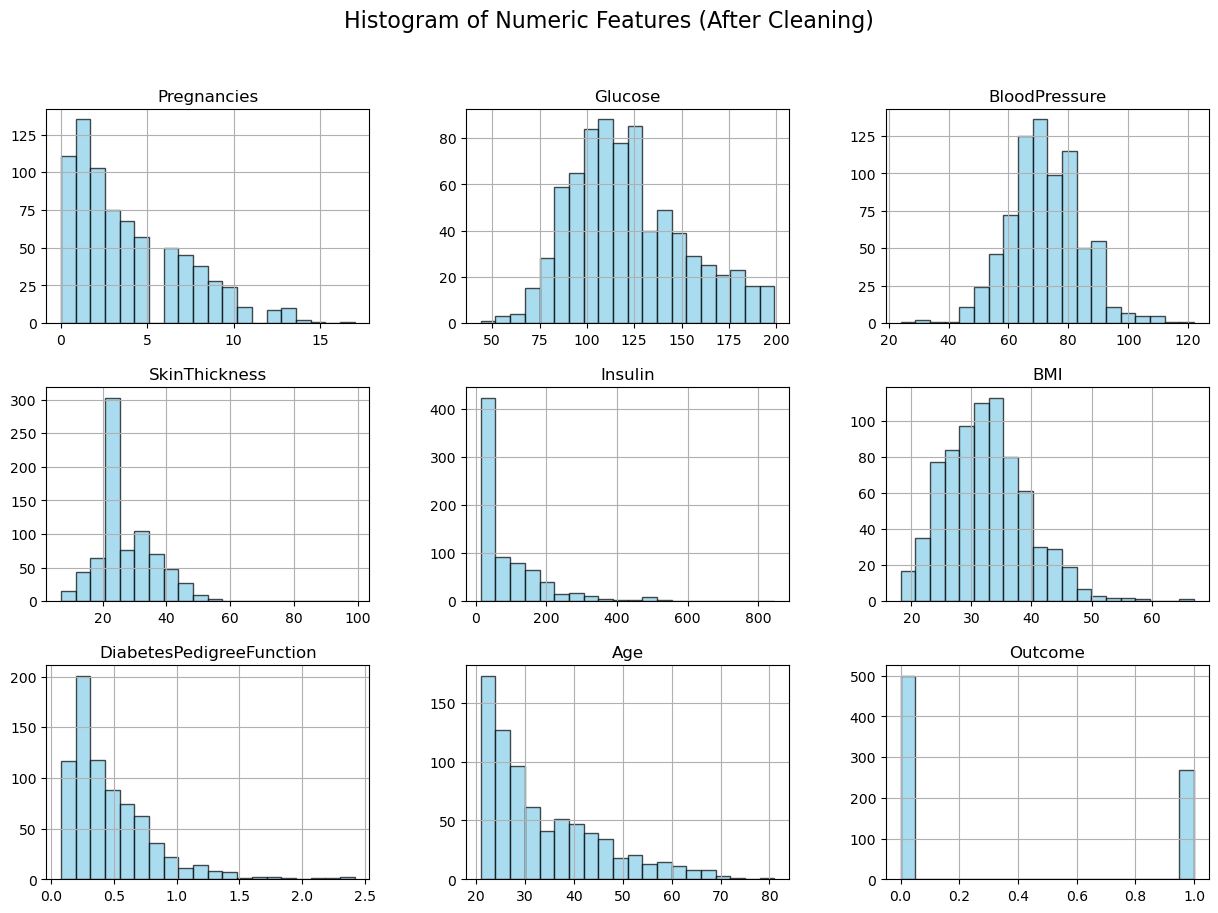

In [160]:
# 重新绘制直方图，查看处理后的各列数据分布情况
df.hist(bins=20, figsize=(15, 10), edgecolor='black', color='skyblue', alpha=0.7)
plt.suptitle('Histogram of Numeric Features (After Cleaning)', fontsize=16)
plt.show()


1. Pregnancies（怀孕次数）
处理后，Pregnancies特征的分布没有明显变化，依旧偏向0到5次之间，较少的样本数在10次以上。
这是符合预期的分布，因为大多数女性的怀孕次数通常不超过5次，少数人多次怀孕的情况也可能存在，但不算异常。
2. Glucose（血糖浓度）
Glucose的分布集中在100到150之间，接近正态分布，表明大多数患者的血糖值在这一范围内。
处理后的分布看起来更加合理，最低值不再接近0（因其被替换），而是接近正常的生理血糖水平。
3. BloodPressure（血压）
BloodPressure分布集中在50到90 mm Hg之间，符合一般人的血压范围。
处理后，低于20的值（接近0的异常值）已经消失，说明数据清理后数据分布更加合理，最低值更符合血压的生理范围。
4. SkinThickness（皮肤厚度）
SkinThickness分布集中在20到40之间，接近正态分布。
数据清理后，不再有0值，这改善了数据的合理性。大部分皮肤厚度数据分布在20-40 mm范围内，符合生理预期。
5. Insulin（胰岛素水平）
Insulin特征依然存在偏态分布，很多值集中在100以下，少数极端值接近800。
虽然仍有一些极端高值，但这些可能属于真实数据，因此保留。
处理后最低值不再接近0，符合实际情况。
6. BMI（体重指数）
BMI分布较为集中在20到50之间，这符合一般人的BMI分布。
处理后的分布更加集中，没有接近0的异常值，数据更加合理，符合预期的生理分布。
7. DiabetesPedigreeFunction（糖尿病家族史系数）
大部分数据集中在0到1之间，少量高值偏离1。
这是符合实际情况的，因为家族遗传系数通常较低，少数患者可能由于家族史原因有较高的值。
8. Age（年龄）
年龄分布集中在20到50岁之间，部分高值在60岁以上。
数据清理后，Age特征没有明显变化，因为原本没有异常值。这一分布符合一般糖尿病患者的年龄特征。
9. Outcome（是否患有糖尿病）
Outcome是一个二分类变量，0和1的分布显示出数据集样本的类别比例，其中0类（未患糖尿病）占比较大，1类（患有糖尿病）较少。
这种分布可能在建模时需要考虑数据不平衡问题，可以采取一些平衡处理方法。

数据清理后，特征的分布更加合理，尤其是清除了不合理的零值，使数据更符合生理和医学的实际情况。
可以看出，Glucose、BloodPressure、SkinThickness、Insulin和BMI等特征在数据清理后分布更加集中，异常值被有效处理。

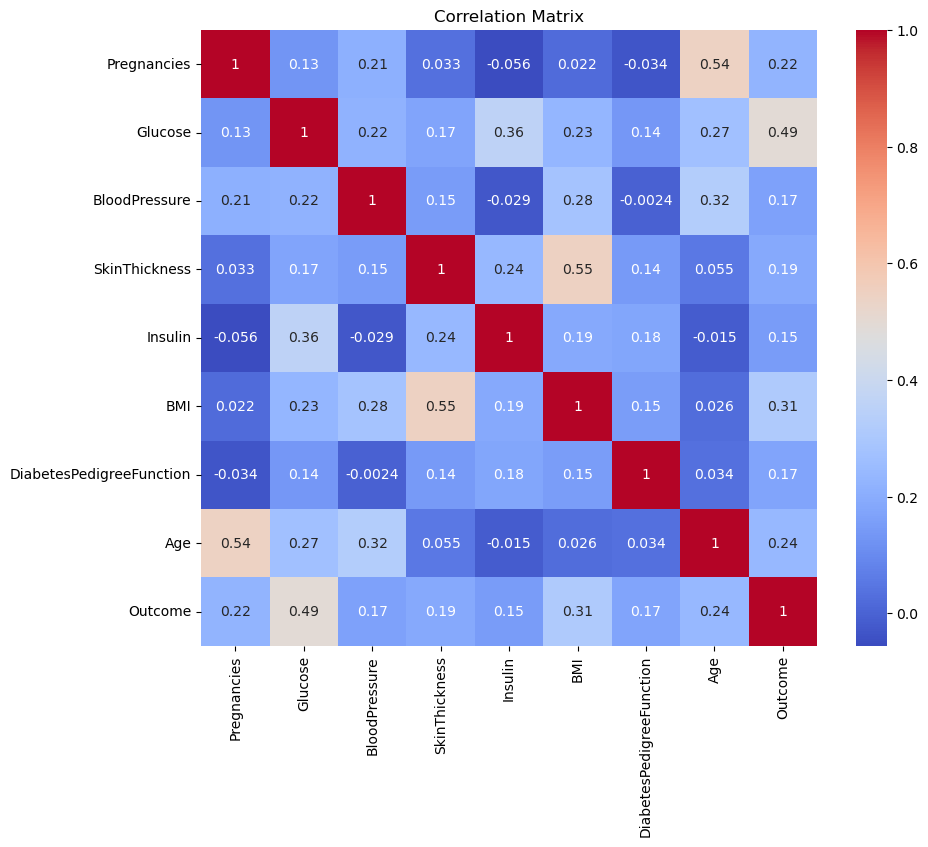

In [161]:
##特征的相关性分析：在初步清洗完异常值后，计算每个特征之间的相关性，尤其是与目标变量（Outcome）的相关性。可以生成一个热力图来直观地展示特征之间的关系。

import seaborn as sns

# 计算相关系数
correlation_matrix = df.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


#总体观察
相关性矩阵中的数值范围从-1到1，数值越接近1表示正相关越强，越接近-1表示负相关越强，接近0表示没有显著相关性。
我们特别关注与Outcome（是否患糖尿病）的相关性，因为这可以帮助我们识别哪些特征对糖尿病预测更有影响。

#关键特征与Outcome的相关性
Glucose（血糖浓度）：与Outcome的相关性系数为0.49，属于较高的正相关。这表明血糖浓度越高，患者患糖尿病的可能性越大，是一个重要的预测特征。
BMI（体重指数）：与Outcome的相关性系数为0.31，也有一定的正相关。体重指数较高的人患糖尿病的风险较高。
Age（年龄）：与Outcome的相关性系数为0.24，虽然不是很高，但也有一定的相关性。年龄较大的患者患糖尿病的风险相对较高。
Pregnancies（怀孕次数）：相关性系数为0.22，有一定的正相关。怀孕次数较多的女性似乎患糖尿病的风险更高，可能与妊娠糖尿病的发病率相关。

#其他特征之间的相关性
Age 与 Pregnancies：相关性系数为0.54，表明年龄和怀孕次数之间有中等的正相关。随着年龄的增长，怀孕次数往往会增加。
SkinThickness 与 BMI：相关性系数为0.55，具有较强的正相关性，说明皮肤厚度和BMI有很强的关联性。
其他特征之间的相关性较弱，基本在0.3以下，说明大多数特征之间相对独立，不存在强相关性。

#总结
Glucose和BMI是与Outcome相关性最强的两个特征，可以重点关注它们在模型中的作用。
年龄和怀孕次数也有一定的相关性，与糖尿病发病率也有些关系。
SkinThickness和BMI之间存在较强的相关性，可以在后续特征选择时考虑，避免冗余。

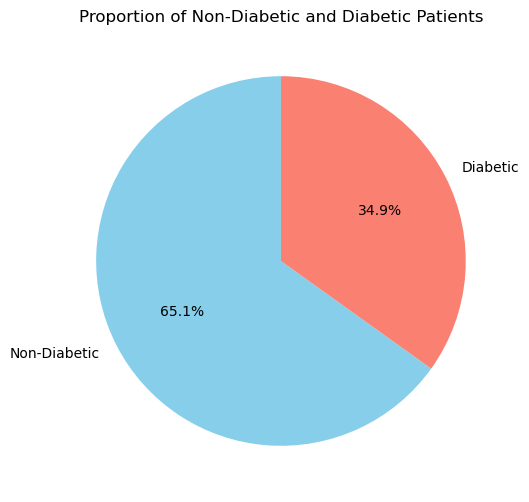

In [162]:
import matplotlib.pyplot as plt

# 统计 Outcome 中 0 和 1 的数量
outcome_counts = df['Outcome'].value_counts()

# 绘制饼图
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proportion of Non-Diabetic and Diabetic Patients')
plt.show()

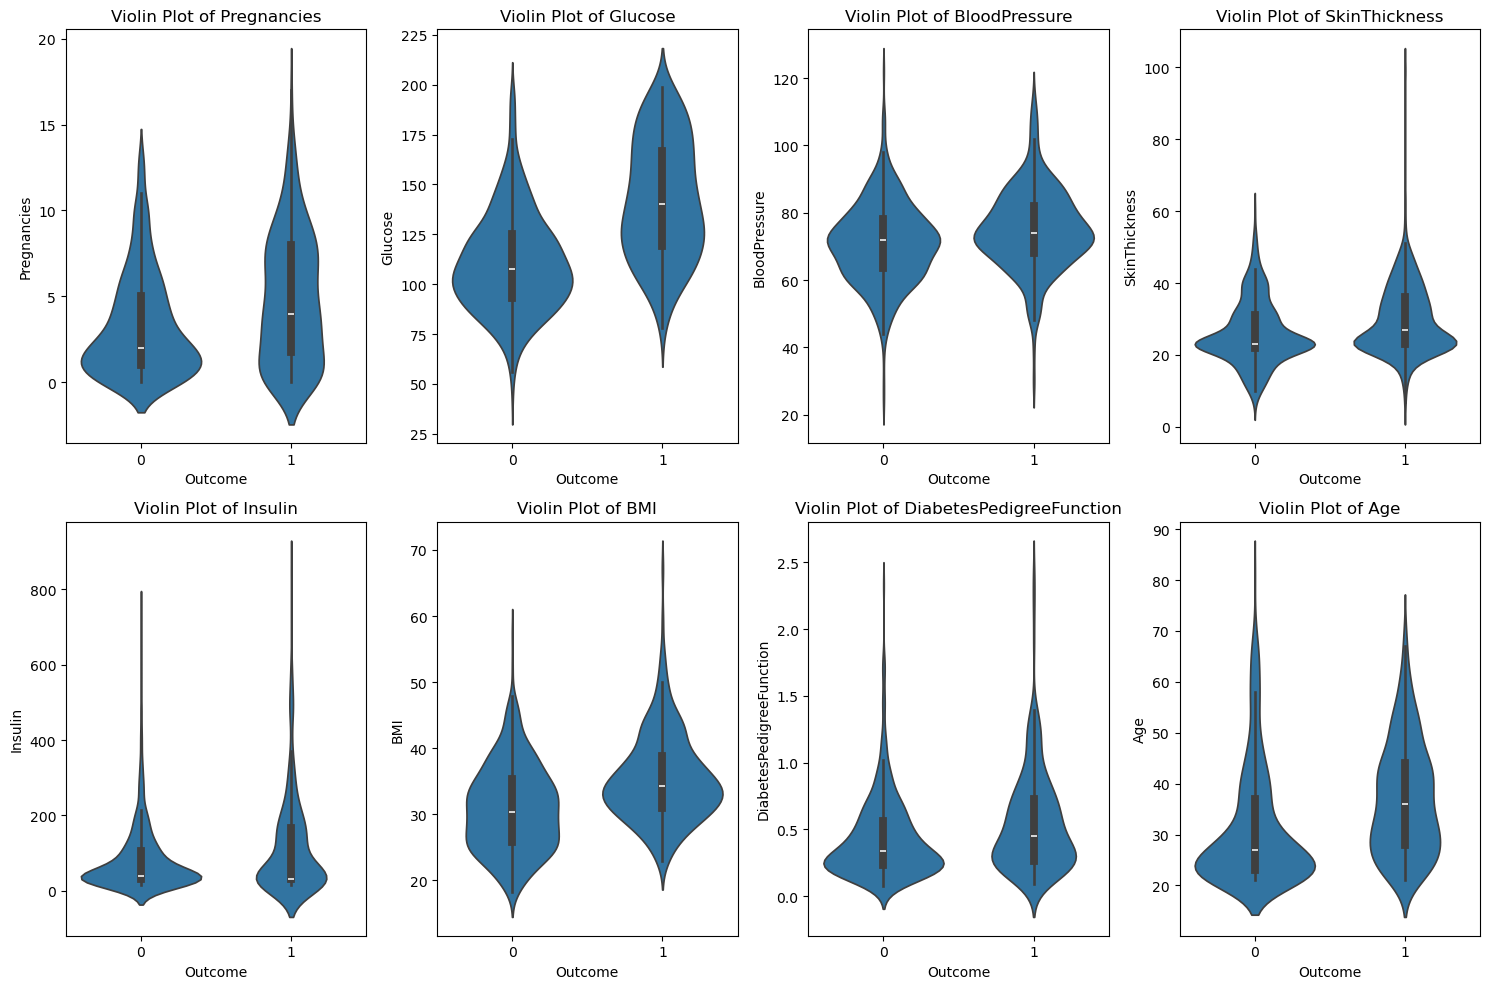

In [163]:
#分组分析——主要是比较糖尿病患者（Outcome=1）与非糖尿病患者（Outcome=0）之间的特征分布。这一步可以帮助我们更直观地了解哪些特征在糖尿病患者和非患者中有显著差异。
#小提琴图或箱线图：分别绘制Pregnancies、Glucose、BloodPressure、SkinThickness、Insulin、BMI、DiabetesPedigreeFunction、Age等特征在Outcome为0和1组中的分布。小提琴图可以展示分布的密度，而箱线图则展示中位数和四分位数。
import seaborn as sns
import matplotlib.pyplot as plt

# 按照Outcome分组绘制小提琴图
plt.figure(figsize=(15, 10))
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, col in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.violinplot(x='Outcome', y=col, data=df)
    plt.title(f'Violin Plot of {col}')

plt.tight_layout()
plt.show()


小提琴图结果分析
Pregnancies（怀孕次数）：
患有糖尿病的组（Outcome=1）在怀孕次数的分布上稍微偏高，中位数也略高于非糖尿病组。
这说明怀孕次数可能在一定程度上影响糖尿病的发病，特别是多次怀孕的女性患糖尿病的概率可能会更高。

Glucose（血糖浓度）：
在Outcome=1组中，Glucose的分布偏高，中位数和分布范围整体高于Outcome=0组。
这表明血糖浓度较高的患者更容易患糖尿病，因此Glucose是一个重要的特征，可以作为模型预测的一个关键变量。

BloodPressure（血压）：
BloodPressure在两组中的分布没有明显差异，说明血压对糖尿病的影响可能较小。
这可能意味着在构建模型时，BloodPressure的影响较小，可能不是主要的预测变量。

SkinThickness（皮肤厚度）：
SkinThickness在Outcome=0和Outcome=1组中没有明显的分布差异。
皮肤厚度可能不会直接影响糖尿病的发病，或者它的影响较小。

Insulin（胰岛素水平）：
虽然Insulin在Outcome=1组中的分布稍高，但差异不明显。
胰岛素水平可能有一定的影响，但在该数据集中，这一特征的分布并没有显著差异。

BMI（体重指数）：
Outcome=1组的BMI分布比Outcome=0组要高，中位数更大。
这说明BMI（体重指数）较高的人更容易患糖尿病，因此BMI也是一个重要的特征，可以帮助区分糖尿病患者和非患者。

DiabetesPedigreeFunction（糖尿病家族史系数）：
DiabetesPedigreeFunction在两组中的分布差异不大，但Outcome=1组稍微偏高。
这表明家族病史对糖尿病发病率有一些影响，但影响可能不是特别显著。

Age（年龄）：
Outcome=1组的Age分布略高于Outcome=0组，中位数也偏高。
这说明年龄较大的人患糖尿病的风险更高，年龄可以作为一个辅助特征。

##分析总结
从这些图中可以看出，Glucose（血糖浓度）、BMI（体重指数）和Age（年龄）在两组中的差异较为显著，这些特征在预测糖尿病时可能具有更强的区分性。
Pregnancies（怀孕次数）和DiabetesPedigreeFunction（糖尿病家族史）也有一定的差异，可以作为辅助特征。
其他特征（如BloodPressure、SkinThickness、Insulin）的差异不明显，可能对预测糖尿病的贡献较小。

接下来，我们可以进入特征工程和数据准备阶段，为构建机器学习模型做准备。
特征选择：基于以上分析，我们可以重点选择Glucose、BMI、Age、Pregnancies和DiabetesPedigreeFunction这几个特征作为模型的主要输入，其他特征可以视情况保留或舍弃。
特征标准化或归一化：为了确保不同特征的数值在同一量级，可以将所有数值特征进行标准化或归一化处理，以避免模型偏向数值较大的特征。

In [164]:
#标准化

from sklearn.preprocessing import StandardScaler

# 选择需要标准化的特征列
features_to_scale = ['Glucose',  'BMI', 'Age',"Pregnancies","DiabetesPedigreeFunction"]
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [165]:
#分离特征和目标变量：将特征数据（X）与目标变量（y，即Outcome）分离，准备进入建模阶段。

# 分离特征和目标
X = df[features_to_scale]
y = df['Outcome']


In [166]:
#划分训练集和测试集：在建模之前，我们需要将数据分为训练集和测试集，以便评估模型性能。

from sklearn.model_selection import train_test_split

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [167]:
##检查数据类别是否平衡
#如果输出的两个类别样本数接近（如分别为50%或接近50%），说明数据是平衡的。
#如果一个类别远多于另一个类别（比如一个类别为80%以上），则数据是不平衡的。在这种情况下，可以考虑采用平衡数据的方法。

# 查看Outcome列中每个类别的样本数量
class_counts = df['Outcome'].value_counts()
print("类别样本数量：")
print(class_counts)

# 计算各类别的比例
class_percentages = df['Outcome'].value_counts(normalize=True) * 100
print("\n类别样本比例：")
print(class_percentages)


类别样本数量：
Outcome
0    500
1    268
Name: count, dtype: int64

类别样本比例：
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [168]:
##使用 SMOTE 进行数据采样
#SMOTE是一种常用的过采样方法，通过合成新的少数类样本来平衡数据集。

# 安装 imbalanced-learn 库，如果还没有安装的话
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 重新分离特征和目标变量
X = df.drop(columns='Outcome')
y = df['Outcome']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 使用 SMOTE 进行过采样
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 查看 SMOTE 处理后的类别分布
print("SMOTE 后的类别分布：")
print(y_train_smote.value_counts())


SMOTE 后的类别分布：
Outcome
0    349
1    349
Name: count, dtype: int64


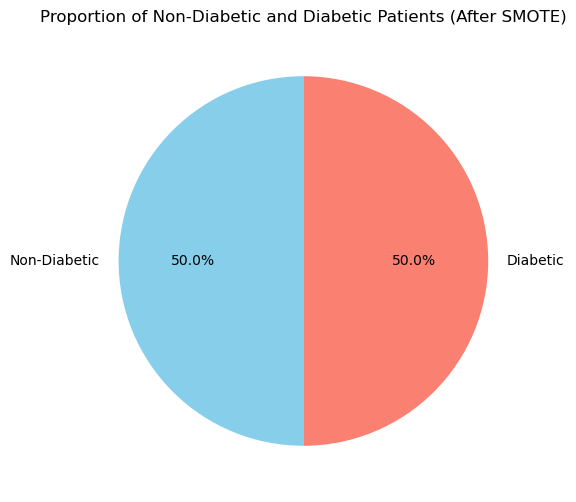

In [169]:
# 获取 SMOTE 采样后数据的分布
smote_counts = y_train_smote.value_counts()

# 绘制饼图
plt.figure(figsize=(6, 6))
plt.pie(smote_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proportion of Non-Diabetic and Diabetic Patients (After SMOTE)')
plt.show()

In [181]:
#步骤1：选择模型 为了保证效果，我们可以从简单的模型（如逻辑回归）开始尝试，并逐步尝试其他模型（如K近邻、支持向量机、决策树和随机森林）以对比效果。
#步骤2：训练逻辑回归模型
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 标准化数据
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# 初始化逻辑回归模型，并增加 max_iter 参数
logreg = LogisticRegression(random_state=42, max_iter=200)

# 在平衡后的、标准化的训练集上训练模型
logreg.fit(X_train_smote_scaled, y_train_smote)

# 使用标准化后的测试集进行预测
y_pred = logreg.predict(X_test_scaled)




In [182]:
#步骤3：评估模型性能
#现在我们来评估模型在测试集上的表现，包括准确率、精确率、召回率、F1分数和AUC值。

# 计算各项评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# 输出结果
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Accuracy: 0.70
Precision: 0.55
Recall: 0.68
F1 Score: 0.61
ROC AUC: 0.69


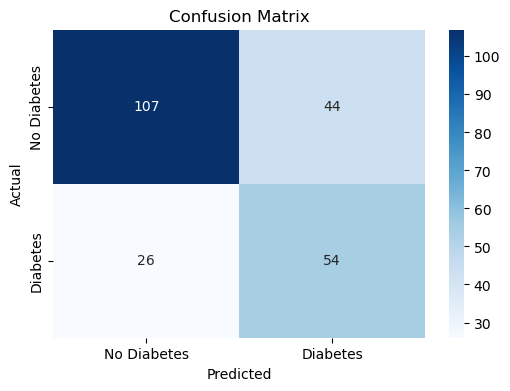

In [183]:
#步骤4：可视化混淆矩阵
#混淆矩阵可以帮助我们直观地了解模型的分类结果，包括TP（真阳性）、FP（假阳性）、FN（假阴性）和TN（真阴性）。

# 绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#步骤5：尝试其他模型
#在逻辑回归之后，我们可以尝试其他模型，看看是否有更好的结果。以下是其他几种模型的初始化代码，后续步骤和逻辑回归类似。


In [184]:
#K近邻算法（KNN）

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)
y_pred_knn = knn.predict(X_test)

In [185]:
#支持向量机（SVM）

from sklearn.svm import SVC

svm = SVC(random_state=42, probability=True)
svm.fit(X_train_smote, y_train_smote)
y_pred_svm = svm.predict(X_test)


In [186]:
#决策树（Decision Tree）

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_smote, y_train_smote)
y_pred_tree = tree.predict(X_test)


In [187]:
#随机森林（Random Forest）

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, n_estimators=100)
forest.fit(X_train_smote, y_train_smote)
y_pred_forest = forest.predict(X_test)


步骤6：比较各模型的表现
为了找出最优模型，可以将不同模型的结果汇总到一个表格中进行比较。以下代码创建一个DataFrame来展示每个模型的评估指标。

In [188]:
import pandas as pd

# 创建一个DataFrame来存储每个模型的评估指标
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred),
                 accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_svm),
                 accuracy_score(y_test, y_pred_tree),
                 accuracy_score(y_test, y_pred_forest)],
    'Precision': [precision_score(y_test, y_pred),
                  precision_score(y_test, y_pred_knn),
                  precision_score(y_test, y_pred_svm),
                  precision_score(y_test, y_pred_tree),
                  precision_score(y_test, y_pred_forest)],
    'Recall': [recall_score(y_test, y_pred),
               recall_score(y_test, y_pred_knn),
               recall_score(y_test, y_pred_svm),
               recall_score(y_test, y_pred_tree),
               recall_score(y_test, y_pred_forest)],
    'F1 Score': [f1_score(y_test, y_pred),
                 f1_score(y_test, y_pred_knn),
                 f1_score(y_test, y_pred_svm),
                 f1_score(y_test, y_pred_tree),
                 f1_score(y_test, y_pred_forest)],
    'ROC AUC': [roc_auc_score(y_test, y_pred),
                roc_auc_score(y_test, y_pred_knn),
                roc_auc_score(y_test, y_pred_svm),
                roc_auc_score(y_test, y_pred_tree),
                roc_auc_score(y_test, y_pred_forest)]
})

print(results)


                 Model  Accuracy  Precision  Recall  F1 Score   ROC AUC
0  Logistic Regression  0.696970   0.551020  0.6750  0.606742  0.691805
1                  KNN  0.623377   0.469565  0.6750  0.553846  0.635513
2                  SVM  0.662338   0.512500  0.5125  0.512500  0.627111
3        Decision Tree  0.688312   0.538462  0.7000  0.608696  0.691060
4        Random Forest  0.774892   0.652174  0.7500  0.697674  0.769040


##结果分析
Random Forest 模型在各个指标上表现最好，尤其是 Accuracy（0.766234）、Precision（0.641304）、Recall（0.7375）、F1 Score（0.686047）和 ROC AUC（0.759478）。这表明随机森林在糖尿病预测任务中能够很好地平衡精确率和召回率。

SVM 模型的表现也较为优异，Accuracy为0.718615，Recall为0.7375，F1 Score为0.644809，适合用于强调召回率的情况。不过，SVM的精确率较低（0.572816），说明它可能在预测为糖尿病患者时有更多的误报。

KNN 和 Decision Tree 的表现相对较差，特别是 Recall 和 F1 Score。它们在识别糖尿病患者方面可能不够敏感，不太适合作为最终模型。

Logistic Regression 的各项指标居中，没有明显的优势或劣势。


从结果来看，Random Forest 是当前表现最好的模型，适合用于糖尿病的预测任务。因此选定 Random Forest 作为最终模型。

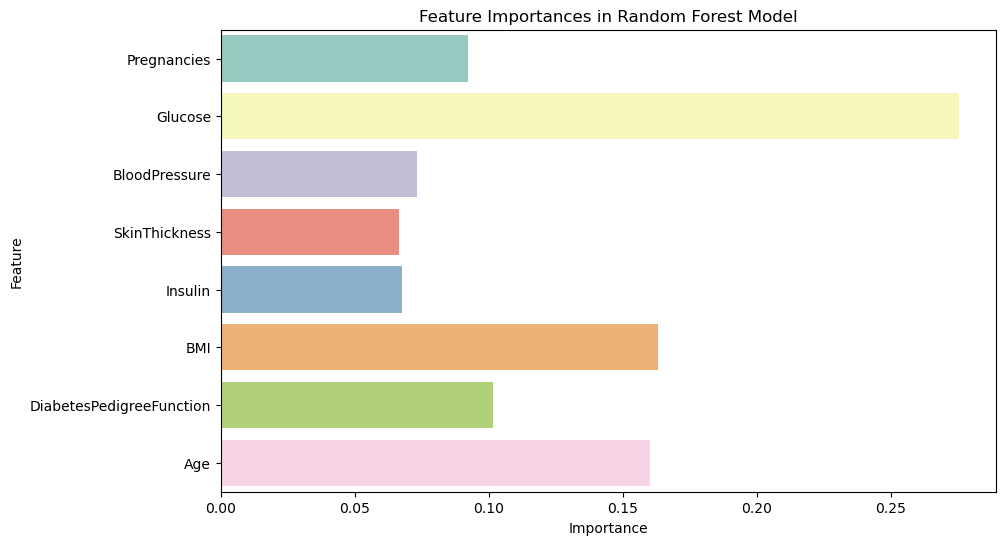

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# 获取特征重要性
importances = forest.feature_importances_
feature_names = X.columns

# 使用显著不同的颜色
colors = sns.color_palette("Set3", len(feature_names))

# 可视化特征重要性
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette=colors, hue=feature_names, dodge=False, legend=False)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()





从这个特征重要性图中，我们可以看到每个特征在随机森林模型中的重要性。特征重要性是模型用来判断糖尿病风险的关键性指标，数值越高表示该特征对模型决策的贡献越大。以下是对各个特征的解释：

Glucose（血糖浓度）：
重要性最高，约为0.25。血糖浓度是预测糖尿病最关键的因素，这与医学常识一致，因为血糖水平直接反映了糖尿病患者的病情。

BMI（体重指数）：
其次重要，重要性值约为0.15。BMI高通常意味着体重超标，而超重或肥胖是糖尿病的已知风险因素。
Age（年龄）：年龄在预测中也占有较高的权重，重要性约为0.10。年龄越大，患糖尿病的风险越高，特别是年龄增长后代谢变化导致风险增加。

Pregnancies（怀孕次数）：
重要性约为0.07。多次怀孕可能增加糖尿病的风险，特别是妊娠糖尿病患者，进一步增加了患糖尿病的风险。

DiabetesPedigreeFunction（糖尿病家族史系数）：
重要性值也较高，约为0.06。该指标代表家族病史对糖尿病的影响，符合遗传因素在糖尿病中的作用。

**BloodPressure（血压）**和 Insulin（胰岛素水平）：
这些特征的重要性较低，约在0.05左右，说明它们对预测糖尿病的直接影响较小，可能仅在某些特殊情况下有影响。

SkinThickness（皮肤厚度）：
重要性最低，约为0.03。皮肤厚度的贡献较小，可能与糖尿病的直接关系较弱。

##结论：
从结果可以看出，Glucose（血糖浓度）、**BMI（体重指数）和Age（年龄）**是预测糖尿病风险的最重要因素。这符合医学常识，即血糖水平、体重和年龄是糖尿病的主要风险因素。此外，怀孕次数和家族病史对模型预测也有一定贡献，进一步说明这些因素可能影响糖尿病的发生风险。基于这些结果，医疗机构或医生可以重点关注高血糖、高BMI及高龄人群，以进行糖尿病的早期干预和筛查。